# Loop Tutorial - Simple fold 

## A - Theoritical Review
## I - The Fold Frame

### 1 - Definition of a fold 

Folds are curved geolgical structures that dispalys folding of e.g. bedding, tectonic cleavage. 
Fold geometry is characterized by: (1) a hinge, distinguished by the maximum curvature along folded surface; (2) an axial surface, passes through all maximum curvature points in all folded foliations; (3) a fold axis, is distinguished by the intersection of the folded foliation and the axial surface; (4) a fold movement direction, is the direction of the deformed foliation within the axial surface that is sheared or deviated from its original geometry (Laurent et al., 2016; Grasemann et al., 2004; Ramsay, 1962).
 
Fold geometry is related to the local principal finite strain directions developed in a specific folding event. These directions correspond to the directions of greatest, intermediate and least elongation denoted respectively $\vec{X}$, $\vec{Y}$ and $\vec{Z}$.
$\vec{Z}$ direction is orthogonal to the fold limbs and the axial surface and it is the greatest shortening direction. $\vec{X}$ is the maximum elongation direction and the fold movement direction align generally parallel to it. in the case of cylindrical folds, the fold axis is parallel to $\vec{Y}$. for non-cylindrical folds, the fold axis direction vary and deviate from $\vec{Y}$ (Laurent et al., 2016). 

A Folding event is commonlly accompanied by the formation of different structural elements: (1) an axial foliation, aligned with $\vec{X}$, $\vec{Y}$ and perpendicular to $\vec{Z}$; (2) an intersection lineation L$_{i}$, defined by the intersection between the foliations S$_{i}$ and S$_{i-1}$. These structural elements are usually observed in the field and should be used as constraints for fold geometries. 


### 2 - The Fold Frame

The principal finite strain directions provide a consistent framework for describing fold geometries and structural elements. To define a coordinate system referred to as fold frame, we use the concept of principal finite strain directions. The curvilinear axes coordinate system correspond to $\vec{X}$, $\vec{Y}$ and $\vec{Z}$. Every spatial position is located by the fold frame in the fold structure. Every axis carry a coordinate represented by a 3D scalar field, respectively designated as x, y and z. 
The x coordinate, is the distance measured along $\vec{X}$ from a reference point. For non-similar folds this coordinates is useful because their geometry vary with respect to x. The y coordinate is the distance measured along $\vec{Y}$ from a reference point which is useful for measuring the variations of fold axis in non-cylindrical folds. The z coordinate is the distance measured along $\vec{Z}$ from a reference axial surface. The variation of the deformed foliation can be described using the z coordinate. 
For any location v, three local direction vectors are defined by the fold frame and are used to determine the relative orientation of structural elements and foliation. 

$\left\{
  \begin{array}{lr}
e_{x} &=  \Delta x / \|\Delta x\| \\ 
e_{y} &=  \Delta y / \|\Delta y\| \\
e_{z} &= \Delta z / \|\Delta z\|
  \end{array}
\right.$

###### - Structural elements constraints 

(1) Axial foliations are relatively consistent and planar in a given area. they represent a key element to effectively parametrize folds.

(2) The foliations S$_{i}$ and S$_{i-1}$ have to be orthogonal at the hinge, and L$_{i}$ is parallel to S$_{i}$ and S$_{i-1}$ at any location. 

###### - Vergence and fold rotation angles 

The relative orientation between the axial foliation S$_{i}$ and the folded foliation S$_{i-1}$ is defined as fold vergence. It indicates the direction towards the next fold closure. The vergence is quantified as an angle $\alpha_{v}$. the vergence angle indicate the relative location of measurement with respect to the axial surface and the inflexion points of the limbs of a fold.  A fold limb rotation angle $\alpha_{L}$ is introduced as the signed complement of the vergence angle.
$\alpha_{L} = \left\{
  \begin{array}{lr}
    \alpha_{v} - \pi/2, if  \alpha_{v} > 0\\
    \alpha_{v} + \pi/2, if  \alpha_{v} < 0
  \end{array}
\right.$

<img src="Rotation_Angles.jpg">

**Figure 1**: _Schematic sketch showing: **A**. Fold axis rotation angle is the angle between $e_{y}$ and L$_{i}$ that defines the local fold axis. **B1**. The fold limb rotation angle is the angle between the axial foliation and the normal to the folded foliation, and is complementary with the fold vergence angle. When at the hinge of the fold, the fold limb rotation angle is 0 and (**B2**) in the limbs of an isoclinal fold it can reach -90 to 90 degrees._   


The fold limb rotation angle presents the following properties with respect to the fold frame: 
(1) being 0 at the location of the axial surface,
(2) having an increasing absolute value from the hinges to the limb inflexion points,
(3) reaching a local minimum or maximum at the location of the limb inflexion point,
(4) having a sign that corresponds to the orientation of the limb with respect to the axial surface.

The fold vergence and fold limb rotation angle are computed from foliation intersection and parasitic folds.

The fold axis rotation angle $\alpha_{p}$ is introduced to describe the variation of the fold axis in non-cylindrical folds with respect to the fold frame. Pratically, it is described by rotating $e_{y}$ around $e_{z}$ by an angle $\alpha_{p}$.

# B - Using the Forward Modelling Engine to build a simple fold

### 1 - Building the Fold Frame

#### Import the Forward Modelling Engine modules - FME

In [1]:
#import the Forward Modelling Engine modules - FME
from FME.interpolators.piecewiselinear_interpolator import PiecewiseLinearInterpolator as PLI
from FME.interpolators.discrete_fold_interpolator import DiscreteFoldInterpolator as DFI
from FME.modelling.features.geological_feature import GeologicalFeatureInterpolator
from FME.modelling.structural_frame import StructuralFrameBuilder
from FME.modelling.fold.foldframe import FoldFrame
from FME.modelling.fold.fold import FoldEvent
from FME.modelling.fold.svariogram import SVariogram
from FME.supports.tet_mesh import TetMesh
from FME.visualisation.model_visualisation import LavaVuModelViewer
from FME.visualisation.rotation_angle_plotter import RotationAnglePlotter
# import other libraries
import geopandas
import numpy as np
from scipy.interpolate import Rbf
import matplotlib.pyplot as plt

#### Load data from shapefile<br>
We use geopandas to load the objects from a shapefile. In this case we use a geopackage with three<br>
shapefile layers:<br>
* points - value data<br>
* orientations - orientation data<br>
* bounding box - simple defines the map view of the model area<br>
The bounding box

In [2]:
points = geopandas.read_file('data/data.gpkg',layer='points')
orientations = geopandas.read_file('data/data.gpkg',layer='orientations')
model_area = geopandas.read_file('data/data.gpkg',layer='bounding_box')

If we have a look at the orientation and points data we can see that the points have a geometry<br>
column as well as type and itype.

In [3]:
print(orientations)

  type itype  strike   dip                                     geometry
0   s0    gy     0.0  45.0  POINT (3225.252290554179 559.8953189065505)
1   s0    gy     0.0   0.0  POINT (3878.539635921277 545.4393318827961)
2   s1    gx     0.0  90.0  POINT (3388.985954433261 641.5369063971111)
3   s1    gx     0.0  90.0  POINT (3653.707574793447 637.9105828305326)
4   s1    gx     0.0  90.0  POINT (3771.563090707229 572.6367586321303)
5   s0    gy     0.0   0.0  POINT (3461.512425764819 543.6261700995078)
6   s0    gy   180.0  45.0  POINT (3664.586545493181 543.6261700995071)
7   s0    gy     0.0  45.0  POINT (4083.426917432928 545.4393318827961)


In [4]:
geom = model_area['geometry']#.shapes()
coords = np.array(geom[0].exterior.coords)#[0]
minz = -(np.max(coords[:,0])-np.min(coords[:,0]))/2.

#### Building the Mesh

FME provides a number of different interpolation algorithms for modelling geological surfaces. The most robust algorithm is the PiecewiseLinearInterpolator, which is similar to Discrete Smooth Inteprolation in Gocad.

To initialise a PiecewiseLinearInterpolator, a tetrahedral mesh must be generated. A TetMesh can be build for a bounding box specified by an array with the extremities of the box, the number of tetrahdron (or the volume of the tetrahedron) specifies the resolution of the solution but also will impact the computational time. A good starting point is 50,000 as this is usually results in a system that can be solved quickly on a mid range laptop.

In the following example we will build a cube with 50,000 elements

In [5]:
boundary_points = np.zeros((2,3))
boundary_points[0,0] = np.min(coords[:,0])-10
boundary_points[0,1] = np.min(coords[:,1])
boundary_points[0,2] = minz
boundary_points[1,0] = np.max(coords[:,0])
boundary_points[1,1] = np.max(coords[:,1])
boundary_points[1,2] = -minz*0.1
mesh = TetMesh()
mesh.setup_mesh(boundary_points, n_tetra=50000,)

#### Building the Fold Frame

The following process of building a fold frame cover most cases of structural styles. First, a foliation field S𝑖
is interpolated including all relevant input data (foliations, lineations). When a folding event affects S𝑖 is defined by i.e. F𝑖+1. The foliation S𝑖 is considered as the z coordinate of the fold frame **change**. The y coordinates is interpolated considering the constrain that is orthogonal to z and 𝑒𝑦 to be aligned at best to L𝑖. The coordinate x is interpolated orthogonal to y and z.

The StructuralFrameBuilder needs to be given an interpolator object to use as
a template to interpolate the curvilinear coordinate systems. The StructuralFrameBuilder creates copies
of the interpolator for the different fields that need to be interpolated and assigns property names to
the different fields being interpolated.

In [6]:
fold_frame_interpolator = PLI(mesh)
fold_frame_builder = StructuralFrameBuilder(
    interpolator=fold_frame_interpolator,
    mesh=mesh,
    name='F1_fold_frame')
# Interfacing with dataframes should be done using a convenience wrapper function
for i, r in orientations.iterrows():
    if r['type'] == 's1':
        xy = r['geometry'].xy
        z = 0
        if 'z' in r:
            z = r['z']
        fold_frame_builder.add_strike_and_dip([xy[0][0],xy[1][0],z],r['strike'],r['dip'],itype=r['itype'])
        fold_frame_builder.add_strike_and_dip([xy[0][0],xy[1][0],z],r['strike']-90,90,itype='gy')

We define weights for the orthogonal constraint and the regularisation constraints. The solver to use to solve the least squares system. 

In [7]:
ogw = 3000
ogw /= mesh.n_elements
cgw = 6000
solver='lu'
f1_frame = fold_frame_builder.build(
    frame=FoldFrame,
    solver=solver,
#     gxxgy=2 * ogw,
#     gxxgz=2 * ogw,
#     gyxgz=ogw,
#     gxcg=cgw,
#     gycg=cgw,
#     gzcg=cgw,
#     shape='square',
)

Building gx
Building gy
Creating analytical gz


Now we can visualize the fold frame isosurfaces with Lavavu

Creating isosurface for 584.563341
Creating isosurface for 127.292045



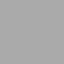

In [8]:
viewer = LavaVuModelViewer(background="white")
viewer.plot_isosurface(f1_frame.features[0],  colour='green')
viewer.plot_isosurface(f1_frame.features[1],  colour='blue')

viewer.plot_vector_data(
    fold_frame_builder.interpolators[1].get_gradient_control()[:,:3],
    fold_frame_builder.interpolators[1].get_gradient_control()[:,3:],
    "grad" # object name
)

# viewer.plot_data()
viewer.interactive()

#### Create a fold event linked to the fold frame<br>
We need to create an empty fold event that links our fold frame to the fold event so that it can<br>
 given to the fold interpolator.

In [9]:
fold = FoldEvent(f1_frame,None,None)

### Create a DiscreteFoldInterpolator object<br>
The DiscreteFoldInterpolator is a daughter class of the PiecewiseLinearInterpolator that<br>
uses a fold event and a mesh to define additional constraints in the least squares system.

In [10]:
fold_interpolator = DFI(mesh,fold)

#### Build the stratigraphy geological feature<br>
We can build the stratigraphy geological feature using the fold interpolator object and<br>
then linking the observations from the shapefile to the interpolator. .

In [11]:
stratigraphy_builder = GeologicalFeatureInterpolator(fold_interpolator, name="folded_stratigraphy")
for i, r in orientations.iterrows():
    if r['type'] == 's0':
        xy = r['geometry'].xy
        z = 0
        if 'z' in r:
            z = r['z']
        stratigraphy_builder.add_strike_and_dip([xy[0][0],xy[1][0],z],r['strike'],r['dip'])
# for i, r in points.iterrows():
#     if r['type'] == 's0':
#         xy = r['geometry'].xy
#         z = 0
#         if 'z' in r:
#             z = r['z']
#         stratigraphy_builder.add_point([xy[0][0],xy[1][0],z],r['value'])

### Set up the fold geometry<br>
**get_gradient_control()** returns an array N,6 array with the xyz and normal vector<br>
components of the gradient control points. We can use these arrays to calculate the<br>
fold axis using the intersection lineation between the axial foliation and the normal<br>
to the folded foliation. The fold axis rotation angle can then be calculated by finding<br>
the angle between the fold axis direction field and the intersection lineation. A<br>
SVariogram can then be used to automatically pick the wavelength of the fold.


In [12]:
xyz = stratigraphy_builder.interpolator.get_gradient_control()[:,:3]
s0g = stratigraphy_builder.interpolator.get_gradient_control()[:,3:]
l1 = f1_frame.calculate_intersection_lineation(np.hstack([xyz,s0g]))
far = f1_frame.calculate_fold_axis_rotation(np.hstack([xyz,l1]))
s1 = f1_frame.features[0].evaluate_value(xyz)
s1gy = f1_frame.features[1].evaluate_value(xyz)
axis_svariogram = SVariogram(s1gy,far)
guess = np.array(axis_svariogram.find_wavelengths())
guess[0] = guess[1]/2.

Rather than interpolate the angle directly we interpolate the gradient<br>
of the curve. Which can be calculated by finding the tangent of the<br>
angle. This means that the interpolated value will not be > 90 or < -90.<br>
We use SciPy's RBF to interpolate the fold rotation angles. A smoothing parameter<br>
prevents overfitting of the interpolated angles.

In [13]:
far_tan = np.tan(np.deg2rad(far))
rbf_fold_axis = Rbf(s1gy,np.zeros(s1gy.shape),np.zeros(s1gy.shape),far_tan,
                    function='gaussian',
                    epsilon=guess[0],
                    smooth=0.05)
xi = np.linspace(f1_frame.features[1].min(),
                 f1_frame.features[1].max(), 1000)

We create a wrapper function for the fold axis rotation angle that can be given to the **FoldEvent**<br>
object so that it can calculate the fold rotation angle for any value of the fold frame.

In [14]:
def fold_axis_rotation(x):
    v = np.zeros(x.shape)
    v[:] = 0
    return v
    #return np.rad2deg(np.arctan(rbf_fold_axis(x,np.zeros(x.shape),np.zeros(x.shape))))
fold.fold_axis_rotation = fold_axis_rotation

#### Evaluate the fold limb rotation angle<br>
The fold axis can be queried for any location in the model. The axis is a unit vector and<br>
does not need to be normalised here. THe fold limb rotation angle is calculated by finding<br>
the angle between the folded foliation and the axial foliation in the fold frame. The calculated<br>
axis can be used by passing an N,3 array of the fold axis for every N locations. Or if no<br>
axis is specified the local intersection lineation is used.

In [15]:
axis = fold.get_fold_axis_orientation(xyz)
flr = f1_frame.calculate_fold_limb_rotation(np.hstack([xyz,s0g]),axis=axis)
print (flr, s1)
limb_svariogram = SVariogram(s1,flr)
guess = limb_svariogram.find_wavelengths()
print (guess)
#guess[0] = 5000.
guess = np.array(limb_svariogram.find_wavelengths())
guess[0] /=2

[-4.49999994e+01  5.83465971e-07  5.83435511e-07  4.50000006e+01
 -4.49999994e+01] [-118.89367212  534.39369298  117.3664707   320.44059637  739.28098048]
[1052.18296917    0.        ]


In [16]:
flr_tan = np.tan(np.deg2rad(flr))
print(flr_tan)
rbf_fold_limb = Rbf(s1,np.zeros(s1.shape),np.zeros(s1.shape),flr_tan,
                    function='gaussian',
                    epsilon=guess[0],
                    smooth=0.0001)
xi = np.linspace(f1_frame.features[0].min(),f1_frame.features[0].max(),1000)
def fold_limb_rotation(x):
    return np.rad2deg(np.arctan(rbf_fold_limb(x,np.zeros(x.shape),np.zeros(x.shape))))

[-9.99999980e-01  1.01834023e-08  1.01828706e-08  1.00000002e+00
 -9.99999980e-01]


The fold rotation angle function is added to the **FoldEvent**

In [17]:
fold.fold_limb_rotation = fold_limb_rotation

#### Describing the geometry of the fold in the fold frame using S-Plot and S-Variogram <br>

The **S-Plot** (the plots on the left side) is a cross plot of the fold axis ($\alpha_{p}$) or the fold limb ($\alpha_{L}$) rotation angles. The fold axis rotation angle ($\alpha_{p}$) is plotted against the y coordinate,and the fold limb rotation angle ($\alpha_{L}$) is plotted against the z coordinate. With the S-plot we can characterize the effect of the younger folding event on the geometry of an older structure independtly from overprinting deformational events.  

- **Fold limb rotation angle ($\alpha_{L}$)**: Based on the fold geometry the S-Plot is subdivided into three segments: positive values of fold limb, negative values of the opposite limb and the location where the fold profile crosses 0 which is the fold hinge.

- **The fold axis rotation angle ($\alpha_{p}$)**: in this example of a simple cylindrical open fold. The S-Plot shows a point at 0 because the fold axis does not change orientation. While in non-cylindrical folds the S-Plot will show a curve rather than a staigth line. 


To characterise the geometry of folds we use the **S-Variogram** as an analytical tool (the plots on the right side) to quantify the spatial evolution of variability. When folding occurs, two points that are close together will have similar orientations and if a pair of points sampled in the opposing limb the Variogram will display large variations. The S-Variogram allows a quantitative analysis of fold geometries with characterisation of fold wavelength and periodicity, which are key structural elements of folds. 

- When the S-Variogram displays a **periodical shape** with a hole effect, the observed structure can be interpreted as a fold train where the half wavelength is regular between adjacent fold hinges. 
- If the S-Variogram **does not exhibit a periodic shape**, it is possible that the data are insufficient to characterise the periodicity of the fold geometry. Or the observed fold geometry may not have a regular wavelengths between adjacent hinges. 

In the following example, the S-Variogram shows a non-periodical shape because the wavelength of the fold is not regular as it is shown in the S-Plot of the fold limb rotation angle. 


#### Plotting rotation angles

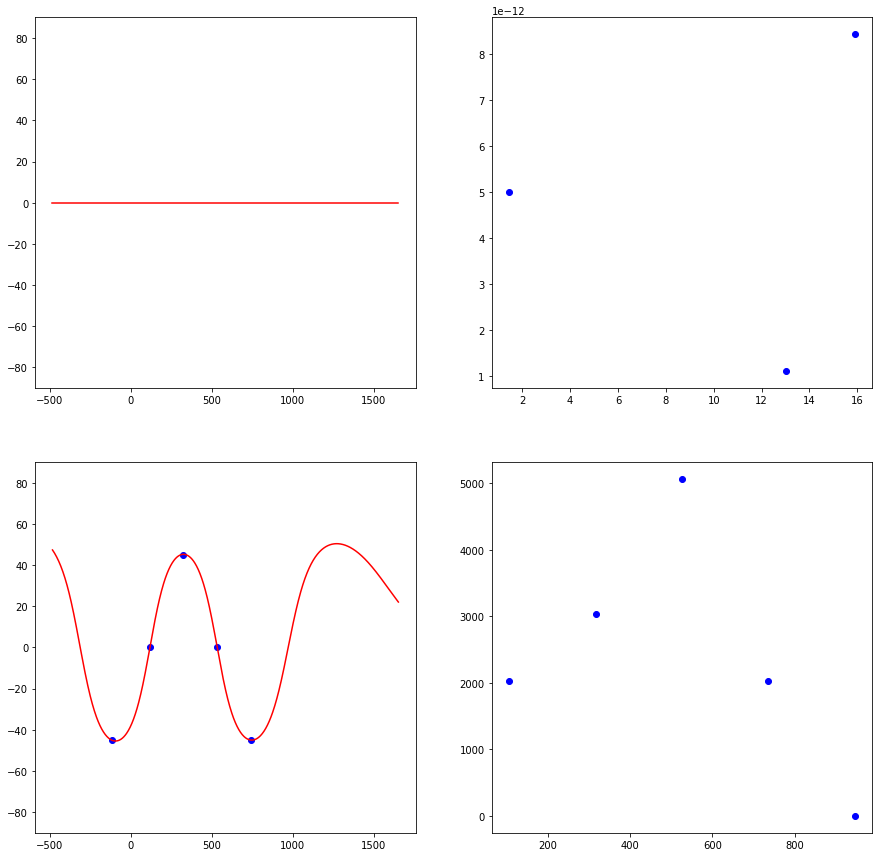

In [18]:
rotation_plots = RotationAnglePlotter()
rotation_plots.add_fold_axis_data(far,s1gy)
rotation_plots.add_axis_svariogram(axis_svariogram)
rotation_plots.add_fold_axis_curve(fold_axis_rotation(xi),xi)
rotation_plots.add_fold_limb_data(flr,s1)
rotation_plots.add_limb_svariogram(limb_svariogram)
rotation_plots.add_fold_limb_curve(fold_limb_rotation(xi), xi)
plt.savefig('fold_rotations.png')

### Define interpolation weights
The DiscreteFoldInterpolator has the ability to weigh the different geometrical properties of the
fold differently in the least squares system. Much the same as data points and regularisation are
handled differently for standard interpolation.

* **fold_orientation** is the weight of the dot product between a
* **fold_axis** is the weight of the dot product between the fold axis and the interpolated foliation
* **fold_normalisation**
* **fold_regularisation** is the fold regularisation term that ensures the fold is smooth along strike

These weights need to be added to a dictionary and then passed to the feature builder along with the fold


In [19]:

fold_weights = {}
fold_weights['fold_orientation'] = 5. # reference values?
fold_weights['fold_axis'] = 5. # reference values?
fold_weights['fold_normalisation'] = 0. # reference values?
fold_weights['fold_regularisation'] = 100.# reference values?
stratigraphy_builder.interpolator.p_g = []
stratigraphy_builder.interpolator.n_g = 0
stratigraphy_builder.interpolator.n_i = 0

stratigraphy_builder.interpolator.p_i = []

folded_stratigraphy = stratigraphy_builder.build(solver=solver,
                                                 fold_weights=fold_weights,
                                                 fold=fold,)

### Visualising Results<br>
We can visualise the surfaces for isovalues of the fold frame or interpolated surface.<br>
Normal vectors to the scalar fields can be visualised for evaluation points (if too many<br>
points are chosen it can be difficult to see the locations. We suggest slicing numpy<br>
arrays to create regularly sampled locations.

In [20]:
viewer = LavaVuModelViewer(background="white")
viewer.plot_isosurface(f1_frame.features[0], 
                       slices=[-6200,-5600],
                       colour='green')
viewer.plot_isosurface(f1_frame.features[1],  colour='blue')
viewer.plot_isosurface(folded_stratigraphy,
                       colour='purple',
                       nslices=10,
                       # paint_with=f1_frame.features[0]
                       )
locations = mesh.barycentre[::20,:]
# viewer.plot_vector_field(f1_frame.features[2], locations=locations, colour='red')
# viewer.plot_vector_field(f1_frame.features[1], locations=locations, colour='green')
viewer.plot_vector_field(folded_stratigraphy, locations=locations, colour='green')

viewer.plot_vector_data(
    stratigraphy_builder.interpolator.get_gradient_control()[:,:3],
    stratigraphy_builder.interpolator.get_gradient_control()[:,3:],
    "grad" # object name
)

#viewer.plot_vector_field(f1_frame.features[0], locations=locations, colour='blue')
viewer.interactive()

Creating isosurface for -6200.000000
No surface to create for isovalue
Creating isosurface for -5600.000000
No surface to create for isovalue
Creating isosurface for 127.292045
Creating isosurface for 0.000000


ValueError: Found array with 0 sample(s) (shape=(0, 3)) while a minimum of 1 is required.